In [21]:
%matplotlib inline


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
texts = ["The caged bird sings with a fearful trill", 
         "for the caged bird sings of freedom"]
cv = CountVectorizer()
d = cv.fit_transform(texts)
# Create a dataframe of the word counts to inspect
# - d.todense() transforms the dtm into a normal (dense) matrix
# - get_feature_names() is a list of the words
pd.DataFrame(d.todense(), columns=cv.get_feature_names()) 

,bird,caged,fearful,for,freedom,of,sings,the,trill,with
0,1,1,1,0,0,0,1,1,1,1
1,1,1,0,1,1,1,1,1,0,0


In [4]:
text = "I haven't seen John's derring-do"
tokenizer = CountVectorizer().build_tokenizer()
tokens_default = tokenizer(text)
print("Scikit-learn default:", tokens_default)
from nltk.tokenize import TreebankWordTokenizer
tokens_treebank = TreebankWordTokenizer().tokenize(text)
print("Treebank tokenizer:", tokens_treebank)



Scikit-learn default: ['haven', 'seen', 'John', 'derring', 'do']
Treebank tokenizer: ['I', 'have', "n't", 'seen', 'John', "'s", 'derring-do']


In [5]:
haiku = "\u53e4\u6c60\u86d9\u98db\u3073\u8fbc\u3080\u6c34\u306e\u97f3"
print("Default tokens", tokenizer(haiku))
import nagisa
print("Nagisa tokens:", nagisa.tagging(haiku).words)

Default tokens ['古池蛙飛び込む水の音']
Nagisa tokens: ['古', '池蛙', '飛び込む', '水', 'の', '音']


In [6]:
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer
sotu = pd.read_csv("http://cssbook.net/d/sotu.csv")
cv = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize)
d = cv.fit_transform(sotu["text"])
d

<85x22223 sparse matrix of type '<class 'numpy.int64'>'
	with 149566 stored elements in Compressed Sparse Row format>

(-0.5, 399.5, 399.5, -0.5)

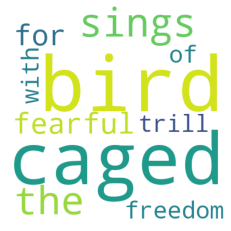

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
frequencies = d.sum(axis=0).tolist()[0]
freq_dict = {term: n for (term, n) in zip(cv.get_feature_names(), frequencies)}
wc = WordCloud(background_color="white", max_words=100, width=400, height=400)
wc.generate_from_frequencies(freq_dict)
plt.imshow(wc)
plt.axis("off")

(-0.5, 399.5, 399.5, -0.5)

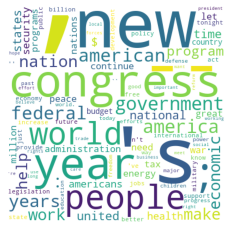

In [8]:
cv = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize, stop_words='english')
d2 = cv.fit_transform(sotu["text"])
frequencies = d2.sum(axis=0).tolist()[0]
freq_dict = {term: n for (term, n) in zip(cv.get_feature_names(), frequencies)}
wc = WordCloud(background_color="white", max_words=100, width=400, height=400)
wc.generate_from_frequencies(freq_dict)
plt.imshow(wc)
plt.axis("off")

In [9]:
# create the transform
from nltk.tokenize.destructive import NLTKWordTokenizer
cv = CountVectorizer(tokenizer=NLTKWordTokenizer().tokenize, stop_words='english')
cv.fit(["Hello, let's go!"])
print('vocabulary: ', cv.vocabulary_)

vocabulary:  {'hello': 3, ',': 2, 'let': 4, "'s": 1, '!': 0}


/home/wva/ccsbook/env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [10]:
# create the transform
from nltk.tokenize import word_tokenize
cv = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
cv.fit(["Hello, let_s go!"])
print('vocabulary: ', cv.vocabulary_)

vocabulary:  {'hello': 2, ',': 1, 'let_s': 3, '!': 0}


In [ ]:
import nltk.tokenize
dir(nltk.tokenize)

In [12]:
import nltk; nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/wva/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

(-0.5, 599.5, 599.5, -0.5)

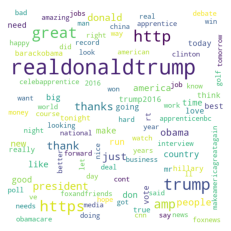

In [23]:
url = "https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv"
tweets = pd.read_csv(url, usecols=["status_id", "text"], index_col="status_id")
cv = CountVectorizer(stop_words='english')
d2 = cv.fit_transform(tweets.text)
frequencies = d2.sum(axis=0).tolist()[0]
freq_dict = {term: n for (term, n) in zip(cv.get_feature_names(), frequencies)}
wc = WordCloud(background_color="white", max_words=100, width=600, height=600)
wc.generate_from_frequencies(freq_dict)
plt.imshow(wc)
plt.axis("off")

In [80]:
import re
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords

url = "https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv"
tweets = pd.read_csv(url, usecols=["status_id", "text"], index_col="status_id")

# 4. Custom preprocessing. Let's tokenize at an indivual tweet to show how it works
tokenizer = WhitespaceTokenizer()

single_tweet = tweets.text.values[tweets.index == "x263687274812813312"][0]
tokens = tokenizer.tokenize(single_tweet)
print(tokens)

# Let's get rid of hyperlinks and HTML escapes before tokenization
single_tweet = re.sub("https?://\\S*|&\\w+;", "", single_tweet)
tokens = tokenizer.tokenize(single_tweet)
print(tokens)

# Now, let's lowercase and drop all stopwords and tokens not starting with a word character
tokens = [t.lower() for t in tokens if re.match("[A-Za-z]", t) and t.lower() not in stopwords.words('english')]
print(tokens)




['Part', '1', 'of', 'my', '@jimmyfallon', 'interview', 'discussing', 'my', '$5M', 'offer', 'to', 'Obama,', '#TRUMP', 'Tower', 'atrium,', 'my', 'tweets', '&amp;', '57th', 'st.', 'crane', 'http://t.co/AvLO9Inf']
['Part', '1', 'of', 'my', '@jimmyfallon', 'interview', 'discussing', 'my', '$5M', 'offer', 'to', 'Obama,', '#TRUMP', 'Tower', 'atrium,', 'my', 'tweets', '57th', 'st.', 'crane']
['part', 'interview', 'discussing', 'offer', 'obama,', 'tower', 'atrium,', 'tweets', 'st.', 'crane']


(-0.5, 599.5, 599.5, -0.5)

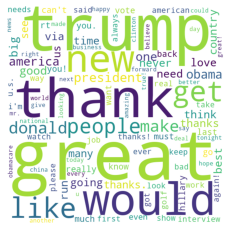

In [79]:
#Now let's do it for the whole corpus
# Drop hyperlinks from data frame
tweets.text = tweets.text.str.replace("https?://\\S*|&\\w+;", "")
# Tokenize all texts, storing the result as a list of lists of tokens
tokens = [tokenizer.tokenize(text) for text in tweets.text.values]
# For each list of tokens, keep only those tokens that start with a letter
tokens = [[t.lower() for t in text_tokens if re.match("[A-Za-z]", t) and t.lower() not in stopwords.words('english')]
          for text_tokens in tokens]
# Create document-term matrix 
def do_nothing(x):
    return x
cv = CountVectorizer(tokenizer=do_nothing, lowercase=False)
dtm_cleaned = cv.fit_transform(tokens)
# Create word cloud
frequencies = dtm_cleaned.sum(axis=0).tolist()[0]
freq_dict = {term: n for (term, n) in zip(cv.get_feature_names(), frequencies)}
wc = WordCloud(background_color="white", max_words=100, width=600, height=600)
wc.generate_from_frequencies(freq_dict)
plt.imshow(wc)
plt.axis("off")
